In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

In [2]:
df = pd.read_csv("Matches.csv")

In [3]:
# Count occurrences in team1 and team2 columns, then combine them
team1_counts = df['team1'].value_counts()
team2_counts = df['team2'].value_counts()

# Sum the counts for each team
total_matches_played = team1_counts.add(team2_counts, fill_value=0).astype(int)

# Create a DataFrame for easier viewing
matches_played_df = total_matches_played.reset_index()
matches_played_df.columns = ['Team', 'Matches_Played']

# Sort and display the result
matches_played_df = matches_played_df.sort_values(by='Matches_Played', ascending=False)
print(matches_played_df)

           Team  Matches_Played
1     Australia              11
4         India              11
3       England              10
6   New Zealand              10
0   Afghanistan               9
2    Bangladesh               9
5   Netherlands               9
7      Pakistan               9
8  South Africa               9
9     Sri Lanka               9


In [4]:

# Count the number of toss wins for each team
toss_wins = df['toss_winner'].value_counts()

# Convert to a DataFrame for easier viewing
toss_wins_df = toss_wins.reset_index()
toss_wins_df.columns = ['Team', 'Toss_Wins']

# Display the result
print(toss_wins_df)

           Team  Toss_Wins
0   Afghanistan          7
1       England          5
2  South Africa          5
3      Pakistan          5
4         India          5
5   Netherlands          5
6     Australia          5
7    Bangladesh          4
8     Sri Lanka          4
9   New Zealand          3


In [5]:
# Count the number of matches each team participated in (either as team1 or team2)
team1_counts = df['team1'].value_counts()
team2_counts = df['team2'].value_counts()
total_matches_played = team1_counts.add(team2_counts, fill_value=0).astype(int)

# Count the number of tosses won by each team
toss_wins = df['toss_winner'].value_counts()

# Calculate tosses lost by subtracting toss wins from total matches played
toss_losses = total_matches_played.subtract(toss_wins, fill_value=0).astype(int)

# Convert to DataFrame for easier viewing
toss_losses_df = toss_losses.reset_index()
toss_losses_df.columns = ['Team', 'Tosses_Lost']

# Sort and display the result
toss_losses_df = toss_losses_df.sort_values(by='Tosses_Lost', ascending=False)
print(toss_losses_df)

           Team  Tosses_Lost
6   New Zealand            7
1     Australia            6
4         India            6
2    Bangladesh            5
3       England            5
9     Sri Lanka            5
5   Netherlands            4
7      Pakistan            4
8  South Africa            4
0   Afghanistan            2


In [6]:
df.head()

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,match_type,extras,winner,looser,win_by_runs,win_by_wickets
0,Afghanistan,England,1,Narendra Modi Stadium,Ahmedabad,England,field,JE Root,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,Group,NaN,England,Afghanistan,NaN,9.0
1,Sri Lanka,South Africa,2,Rajiv Gandhi International Stadium,Hyderabad,South Africa,field,KIC Asalanka,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Group,NaN,Sri Lanka,South Africa,81.0,NaN
2,Netherlands,Pakistan,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Pakistan,field,Babar Azam,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Group,NaN,Pakistan,Netherlands,NaN,6.0
3,New Zealand,Bangladesh,4,Arun Jaitley Stadium,Delhi,Bangladesh,field,DJ Mitchell,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,Group,NaN,New Zealand,Bangladesh,102.0,NaN
4,India,Australia,5,MA Chidambaram Stadium,Chennai,India,bat,GJ Maxwell,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,Group,NaN,Australia,India,NaN,6.0


Question 2a)

In [7]:
# Filter rows where the toss winner also won the match
matches_won_after_toss = df[df['toss_winner'] == df['winner']]

# Count the number of matches won after winning the toss for each team
matches_won_after_toss_count = matches_won_after_toss['winner'].value_counts()

# Convert the result to a DataFrame for easy viewing
matches_won_after_toss_df = matches_won_after_toss_count.reset_index()
matches_won_after_toss_df.columns = ['Team', 'Matches_Won_After_Toss']

# Sort and display the result
matches_won_after_toss_df = matches_won_after_toss_df.sort_values(by='Matches_Won_After_Toss', ascending=False)
print(matches_won_after_toss_df)

           Team  Matches_Won_After_Toss
0     Australia                       5
1       England                       3
2         India                       3
3      Pakistan                       2
4   Afghanistan                       2
5   New Zealand                       1
6  South Africa                       1
7   Netherlands                       1


In [8]:
# Filter matches where the winner is not the toss_winner (indicating the team won after losing the toss)
matches_won_after_losing_toss = df[df['winner'] != df['toss_winner']]

# Count the occurrences of each team in the filtered DataFrame's 'winner' column
matches_won_after_losing_toss_count = matches_won_after_losing_toss['winner'].value_counts()

# Convert to DataFrame for better readability
matches_won_after_losing_toss_df = matches_won_after_losing_toss_count.reset_index()
matches_won_after_losing_toss_df.columns = ['Team', 'Matches_Won_After_Losing_Toss']

# Display the result
print(matches_won_after_losing_toss_df)

           Team  Matches_Won_After_Losing_Toss
0   New Zealand                              6
1     Australia                              5
2         India                              5
3     Sri Lanka                              3
4       England                              3
5   Netherlands                              3
6    Bangladesh                              2
7   Afghanistan                              1
8  South Africa                              1


In [12]:
toss_won_data = df[['toss_winner', 'toss_decision']]

# Calculate percentages for each team
results = []

for team in toss_won_data['toss_winner'].unique():
    team_data = toss_won_data[toss_won_data['toss_winner'] == team]
    matches_won_toss = len(team_data)
    
    # Calculate % chose to bat first
    bat_first_count = len(team_data[team_data['toss_decision'] == 'bat'])
    bat_first_percentage = (bat_first_count / matches_won_toss) * 100 if matches_won_toss > 0 else 0
    
    # Calculate % chose to bowl first
    bowl_first_percentage = 100 - bat_first_percentage  # Since there are only two choices
    
    # Append results
    results.append({
        'Team': team,
        '% matches chose to bat first': bat_first_percentage,
        '% matches chose to ball first': bowl_first_percentage
    })

# Convert to DataFrame for display
results_df = pd.DataFrame(results)
print(results_df)

           Team  % matches chose to bat first  % matches chose to ball first
0       England                      0.000000                     100.000000
1  South Africa                     60.000000                      40.000000
2      Pakistan                     40.000000                      60.000000
3    Bangladesh                     50.000000                      50.000000
4         India                     40.000000                      60.000000
5   Netherlands                     60.000000                      40.000000
6     Australia                     60.000000                      40.000000
7   Afghanistan                     42.857143                      57.142857
8   New Zealand                     66.666667                      33.333333
9     Sri Lanka                     50.000000                      50.000000


Part (b): Stacked Bar Chart for Toss Decision by Venue

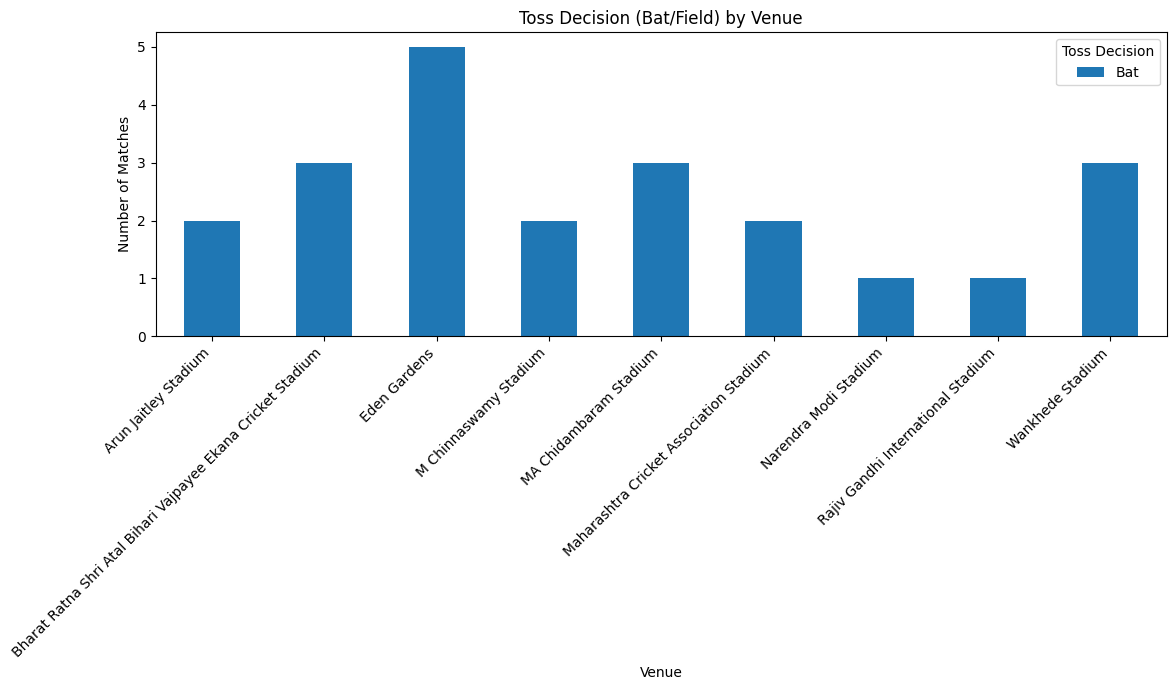

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by venue and toss_decision to count the decisions taken
toss_decision_by_venue = df[df['toss_winner'] == df['team1']].groupby(['venue', 'toss_decision']).size().unstack().fillna(0)

# Plot the stacked bar chart
toss_decision_by_venue.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(12, 7))
plt.title("Toss Decision (Bat/Field) by Venue")
plt.xlabel("Venue")
plt.ylabel("Number of Matches")
plt.legend(title="Toss Decision", labels=['Bat', 'Field'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Part (c): Percentage of Matches Won at Each Venue after Winning the Toss
/

In [16]:
# Filter data for matches where the toss winner won the game
win_after_toss = df[df['toss_winner'] == df['winner']]

# Calculate win percentage for each venue after winning the toss
venue_toss_win_percentage = win_after_toss['venue'].value_counts() / df['venue'].value_counts() * 100
venue_toss_win_percentage = venue_toss_win_percentage.dropna().reset_index()
venue_toss_win_percentage.columns = ['Venue', 'Win Percentage After Toss Win']

print("\nPercentage of Matches Won at Each Venue After Winning the Toss:")
print(venue_toss_win_percentage)


Percentage of Matches Won at Each Venue After Winning the Toss:
                                          Venue  Win Percentage After Toss Win
0                          Arun Jaitley Stadium                           40.0
1                                  Eden Gardens                           60.0
2  Himachal Pradesh Cricket Association Stadium                           40.0
3                         M Chinnaswamy Stadium                           40.0
4                        MA Chidambaram Stadium                           20.0
5       Maharashtra Cricket Association Stadium                           60.0
6                         Narendra Modi Stadium                           60.0
7                              Wankhede Stadium                           40.0


Part (d): Average Wickets Left When Toss-Winning Team Chose to Field and Won


In [18]:
# Filter for matches where toss winner chose to field and won the game
field_first_wins = df[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'field')]

# Calculate the average wickets left in these games
average_wickets_left = field_first_wins['win_by_wickets'].mean()
print(f"\nAverage number of wickets with which the team fielding first won the game: {average_wickets_left:.2f}")


Average number of wickets with which the team fielding first won the game: 6.20
